# Zestaw zadań 1: Rozkłady zmiennych losowych dyskretnych

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietówu
import math

### Funkcje do wykorzystania

In [3]:
def vizualize_discrete_distribution(pmf, cdf, mask=None):
    """
    Parameters
    -------
    pmf: pandas.DataFrame
        Tablica zawierająca indeks z wariantami zmiennej losowej i nadaną nazwą zmiennej (np. X) oraz pojedynczą kolumnę
        z prawdopodobieństwami poszczególnych wariantów o nadanej nazwie bazującej na nazwie zmiennej (np. P(X)).
    cdf: pandas.DataFrame
        Tablica zawierająca index w formacie pandas.IntervalIndex z przedziałami wartości zmiennej losowej i nadaną nazwą zmiennej (np. X)
        oraz pojedynczą kolumnę wartościami dystrybuanty dla poszczególnych przedziałów o nadanej nazwie bazującej na nazwie zmiennej (np. F(X)).
    mask: numpy.ndarray
        Macierz logiczna 1D określająca, które z wariantów zmiennej losowej spełniają wizualizowaną nierówność, a które nie.
    """

    pmf_name = pmf.columns[0]
    pmf_plot = pmf.copy(deep=True)
    
    cdf_name = cdf.columns[0]
    cdf_index = cdf.index.copy(deep=True)
    cdf_index_range = cdf.index[-1].left - cdf.index[0].right
    cdf_index.values[0] = pd.Interval(cdf.index[0].right - 0.1*cdf_index_range, cdf.index[0].right, closed=cdf.index.closed)
    cdf_index.values[-1] = pd.Interval(cdf.index[-1].left, cdf.index[-1].left + 0.1*cdf_index_range, closed=cdf.index.closed)
    cdf_plot = pd.DataFrame(data=cdf.values, index=cdf_index, columns=[cdf_name])
    cdf_plot.index.name = cdf.index.name
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), facecolor='white')

    fig.suptitle("Rozkład prawdopodobieństwa i dystrybuanta zmiennej losowej dyskretnej")

    if mask is None:
        axes[0].scatter(pmf.index, pmf_plot[pmf_name], color="blue")
        axes[0].vlines(pmf.index, 0, pmf_plot[pmf_name], color="blue")
    else:
        axes[0].scatter(pmf.index[~mask], pmf_plot[pmf_name][~mask], color="red")
        axes[0].scatter(pmf.index[mask], pmf_plot[pmf_name][mask], color="green")
        axes[0].vlines(pmf.index[~mask], 0, pmf_plot[pmf_name][~mask], color="red")
        axes[0].vlines(pmf.index[mask], 0, pmf_plot[pmf_name][mask], color="green")
    axes[0].set_title("Rozkład prawdopodobieństwa")
    axes[0].set_xlabel(pmf_plot.index.name)
    axes[0].set_ylabel(pmf_name)

    axes[1].hlines(cdf_plot[cdf_name], cdf_plot.index.left, cdf_plot.index.right, color="grey")
    axes[1].scatter(cdf_plot.index.left[1:], cdf_plot[cdf_name][1:], color="grey")
    axes[1].scatter(cdf_plot.index.right[:-1], cdf_plot[cdf_name][:-1], color='white', edgecolor="grey")
    axes[1].set_title("Dystrybuanta")
    axes[1].set_xlabel(cdf_plot.index.name)
    axes[1].set_ylabel(cdf_name)

### Zadanie 1: Przykładowy dyskretny rozkład prawdopodobieństwa [10 pkt]
Zmienna losowa X ma funkcję rozkładu prawdopodobieństwa daną wzorem:

$$P(X) = \begin{cases}
0.1\text{ dla }x=1\\
0.05\text{ dla }x=3\\
0.15\text{ dla }x=5\\
0.25\text{ dla }x=7\\
0.2\text{ dla }x=9\\
0.15\text{ dla }x=11\\
0.1\text{ dla }x=13\\
\end{cases}$$

#### a) Funkcja rozkładu prawdopodobieństwa w formie tabelarycznej

Przedstaw funkcję rozkładu prawdopodobieństwa zmiennej losowej X w formie tablicy `r1p` o następującej strukturze:

> Indeks:</br>
> X - warianty przyjmowane przez zmienną X.</br>

> Kolumny:</br>
> P(X) - prawdopodobieństwo poszczególnych wariantów.

In [4]:
# YOUR CODE HERE
r1p_variants=np.linspace(1, 13, 7)
r1p_prob=np.array([0.1,0.05,0.15,0.25,0.2,0.15,0.1])
r1p=pd.DataFrame(data=r1p_prob, index=r1p_variants, columns=["P(X)"])
r1p.index.name='X'
print(r1p)

      P(X)
X         
1.0   0.10
3.0   0.05
5.0   0.15
7.0   0.25
9.0   0.20
11.0  0.15
13.0  0.10


In [5]:
# Komórka testowa
assert type(r1p) == pd.DataFrame
assert r1p.shape == (7, 1)
assert list(r1p.columns) == ["P(X)"]
assert r1p.index.name == 'X'
assert np.isclose(np.sum(r1p.index.values), 49)
assert np.isclose(np.sum(r1p["P(X)"]), 1)

#### b) Dystrybuanta w formie tabelarycznej

Przedstaw dystrybuantę zmiennej losowej X w formie tablicy `r1f` o następującej strukturze:

> Indeks:</br>
> X - przedziały, w których wartość dystrybuanty jest stała przedstawione jako `pandas.IntervalIndex`.</br>

> Kolumny:</br>
> F(X) -wartości dystrybuanty wyliczone dla poszczególnych przedziałów.

Uwagi do wykonania zadania:
 - Przedziały wartości zdefiniuj jako `pandas.IntervalIndex` za pomocą jednej z metod tej klasy  -  `from_array()`, `from_tuples()` lub `from_breaks()`.

In [6]:
# YOUR CODE HERE
breaks = np.hstack([-np.inf, r1p.index, np.inf])  #przedzialy - od - inf do wartosci r1p i za tym do nieskonczonosci
intervals = pd.IntervalIndex.from_breaks(breaks, closed="left") #przedzialy
r_cum_prob = np.cumsum(r1p["P(X)"].values)#wartosci kumulatywne - suma prawdopodobienstw z poprzednich przedzialow
r_cum_prob = np.hstack([0, r_cum_prob]) #dodajemy 0 na poczatek bo najmniejsza mozliwa wartosc to 1
r1f=pd.DataFrame(data=r_cum_prob, index= intervals, columns=["F(X)"]) #czyta sie to tak, ze F(X) to szansa ze dostaniemy cos z tego lub mniejsze
r1f.index.name='X'
print(r1f)

              F(X)
X                 
[-inf, 1.0)   0.00
[1.0, 3.0)    0.10
[3.0, 5.0)    0.15
[5.0, 7.0)    0.30
[7.0, 9.0)    0.55
[9.0, 11.0)   0.75
[11.0, 13.0)  0.90
[13.0, inf)   1.00


In [7]:
# Komórka testowa
assert type(r1f) == pd.DataFrame
assert r1f.shape == (8, 1)
assert list(r1f.columns) == ["F(X)"]
assert r1f.index.name == 'X'
assert type(r1f.index) == pd.core.indexes.interval.IntervalIndex
assert r1f.index.closed == 'left'
assert np.isclose(r1f["F(X)"].min(), 0.0)
assert np.isclose(r1f["F(X)"].max(), 1.0)

#### c) Wizualizacja rozkładu prawdopodobieństwa i dystrybuanty

Wykorzystaj funkcję `vizualize_discrete_distribution()` do przedstawienia rozkładu prawdopodobieństwa oraz dystrybuanty rozkładu zmiennej losowej X w formie wykresów.

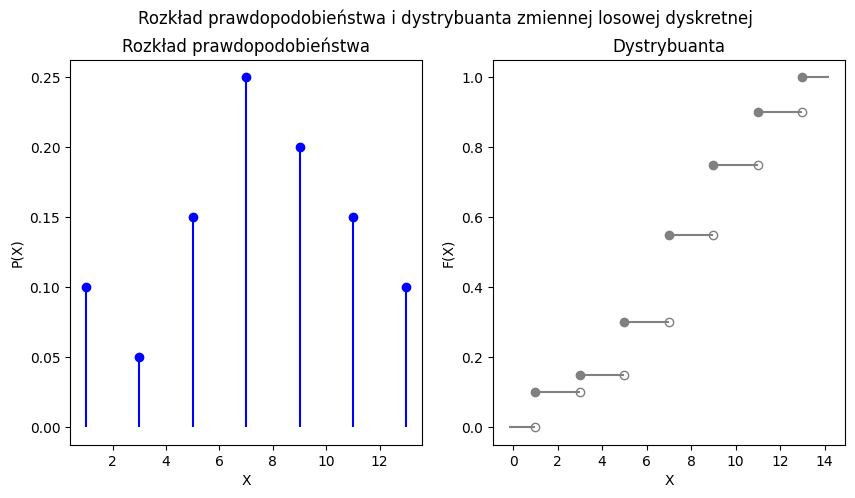

In [8]:
# YOUR CODE HERE
vizualize_discrete_distribution(r1p, r1f) 

#### d) Podstawowe parametry rozkładu

Oblicz i zapisz do zmiennych następujące parametry rozkładu zmiennej losowej X - wartość średnia (`r1_mean`), wariancja (`r1_var`) i odchylenie standardowe (`r1_std`).

In [9]:
# Wartość oczekiwana
# YOUR CODE HERE
r1_mean = np.average(r1p.index.values, weights=r1p['P(X)'])

In [10]:
# Wariancja
# YOUR CODE HERE
r1_var=(r1p.index-r1_mean)**2*r1p["P(X)"]
r1_var=np.sum(r1_var)

In [11]:
# Odchylenie standardowe
# YOUR CODE HERE
r1_std=math.sqrt(r1_var)

In [12]:
# Komórka testowa
assert np.isclose(r1_mean, 7.499999999999999)
assert np.isclose(r1_var, 11.55)
assert np.isclose(r1_std, 3.398529093593286)

### Zadanie 2: Rozkład dwumianowy [10 pkt]

Zmienna losowa Y ma rozkład dwumianowy z prawdopodobieństwem sukcesu $p=0.5$ i liczbą doświadczeń $n=10$.

#### a) Rozkład prawdopodobieństwa w formie tabelarycznej

Przedstaw funkcję rozkładu prawdopodobieństwa zmiennej losowej Y w formie tablicy `r2p` o następującej strukturze:

> Indeks:</br>
> Y - warianty przyjmowane przez zmienną Y.</br>

> Kolumny:</br>
> P(Y) - prawdopodobieństwo poszczególnych wariantów.

Uwagi do wykonania zadania:
 - Warianty przyjmowane przez zmienną Y wygeneruj za pomocą funkcji `numpy.linspace()` lub `numpy.arange()`.
 - Wartości prawdopodobieństwa poszczególnych wariantów oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.binom`.

In [13]:
# YOUR CODE HERE
r2p_variants=np.linspace(0,10,11)
r2p_prob=sp.stats.binom.pmf(r2p_variants, 10, 0.5)
r2p=pd.DataFrame(data=r2p_prob, index=r2p_variants, columns=["P(Y)"])
r2p.index.name="Y"
print(r2p)

          P(Y)
Y             
0.0   0.000977
1.0   0.009766
2.0   0.043945
3.0   0.117187
4.0   0.205078
5.0   0.246094
6.0   0.205078
7.0   0.117187
8.0   0.043945
9.0   0.009766
10.0  0.000977


In [14]:
# Komórka testowa
assert type(r2p) == pd.DataFrame
assert r2p.shape == (11, 1)
assert list(r2p.columns) == ["P(Y)"]
assert r2p.index.name == 'Y'
assert np.isclose(np.sum(r2p.index.values), 55)
assert np.isclose(np.sum(r2p["P(Y)"]), 1.0)

#### b) Dystrybuanta w formie tabelarycznej

Przedstaw dystrybuantę zmiennej losowej Y w formie tablicy `r2f` o następującej strukturze:

> Indeks:</br>
>  Y - przedziały, w których wartość dystrybuanty jest stała przedstawione jako `pandas.IntervalIndex`.</br>

> Kolumny:</br>
> F(Y) - wartości dystrybuanty wyliczone dla poszczególnych przedziałów.

Uwagi do wykonania zadania:
 - Przedziały wartości zdefiniuj jako `pandas.IntervalIndex` za pomocą jednej z metod tej klasy  -  `from_array()`, `from_tuples()` lub `from_breaks()`.
 - Wartości prawdopodobieństwa poszczególnych przedziałów oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.binom`.

In [15]:
# YOUR CODE HERE
breaks = np.hstack([-np.inf, r2p.index, np.inf])  
intervals = pd.IntervalIndex.from_breaks(breaks, closed="left") 
r_cum_prob = np.cumsum(r2p["P(Y)"].values)
r_cum_prob = np.hstack([0, r_cum_prob]) 
r2f=pd.DataFrame(data=r_cum_prob, index= intervals, columns=["F(Y)"]) 
r2f.index.name="Y"
print(r2f)

                 F(Y)
Y                    
[-inf, 0.0)  0.000000
[0.0, 1.0)   0.000977
[1.0, 2.0)   0.010742
[2.0, 3.0)   0.054688
[3.0, 4.0)   0.171875
[4.0, 5.0)   0.376953
[5.0, 6.0)   0.623047
[6.0, 7.0)   0.828125
[7.0, 8.0)   0.945312
[8.0, 9.0)   0.989258
[9.0, 10.0)  0.999023
[10.0, inf)  1.000000


In [16]:
# Komórka testowa
assert type(r2f) == pd.DataFrame
assert r2f.shape == (12, 1)
assert list(r2f.columns) == ["F(Y)"]
assert r2f.index.name == 'Y'
assert type(r2f.index) == pd.core.indexes.interval.IntervalIndex
assert r2f.index.closed == 'left'
assert np.isclose(r2f["F(Y)"].min(), 0.0)
assert np.isclose(r2f["F(Y)"].max(), 1.0)

#### c) Wizualizacja rozkładu prawdopodobieństwa i dystrybuanty

Wykorzystaj funkcję `vizualize_discrete_distribution()` do przedstawienia rozkładu prawdopodobieństwa oraz dystrybuanty rozkładu zmiennej losowej Y w formie wykresów.

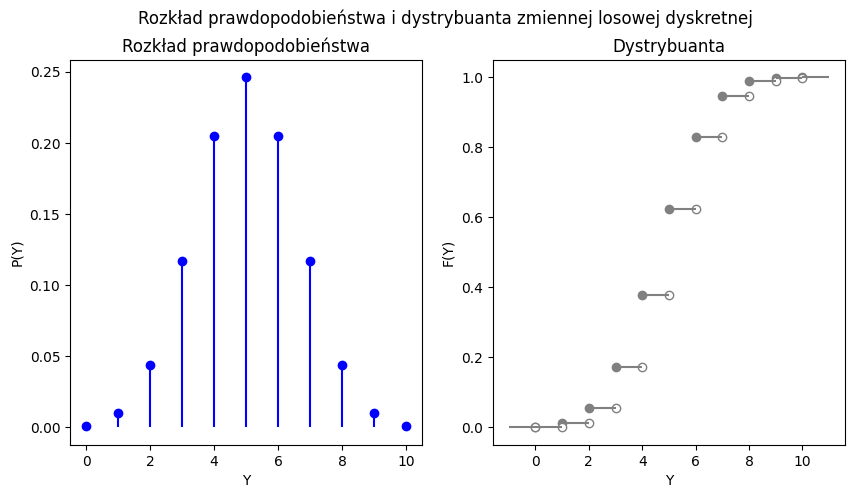

In [17]:
# YOUR CODE HERE
vizualize_discrete_distribution(r2p, r2f)

#### d) Podstawowe parametry rozkładu

Oblicz i zapisz do zmiennych następujące parametry rozkładu zmiennej losowej Y - wartość średnia (`r2_mean`), wariancja(`r2_var`) i odchylenie standardowe (`r2_std`).

Uwagi do wykonania zadania:
 - Wartości poszczególnych parametrów oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.binom`.

In [18]:
# Wartość oczekiwana
# YOUR CODE HERE
r2_mean = np.average(r2p.index.values, weights=r2p['P(Y)'])

In [19]:
# Wariancja
# YOUR CODE HERE
r2_var=(r2p.index-r2_mean)**2*r2p["P(Y)"]
r2_var=np.sum(r2_var)

In [20]:
# Odchylenie standardowe
# YOUR CODE HERE
r2_std=math.sqrt(r2_var)

In [21]:
# Komórka testowa
assert np.isclose(r2_mean, 5.0)
assert np.isclose(r2_var, 2.5)
assert np.isclose(r2_std, 1.5811388300841898)

### Zadanie 3: Rozkład Poissona [10 pkt]

Zmienna losowa Z ma rozkład Poissona z parametrem $\lambda=15$.

#### a) Rozkład prawdopodobieństwa w formie tabelarycznej

Przedstaw funkcję rozkładu prawdopodobieństwa zmiennej losowej Z w formie tablicy `r3p` o następującej strukturze:

> Indeks:</br>
> Z - warianty przyjmowane przez zmienną Z.</br>

> Kolumny:</br>
> P(Z) - prawdopodobieństwo poszczególnych wariantów.

W tablicy zawrzyj tylko warianty zmiennej losowej Z od 0 do wartości przy której suma prawdopodobieństw uwzględnionych wariantów przekracza 0.9999.

Uwagi do wykonania zadania:
 - Warianty przyjmowane przez zmienną Z wygeneruj za pomocą funkcji `numpy.linspace()` lub `numpy.arange()`.
 - Wartości prawdopodobieństwa poszczególnych wariantów oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.poisson`.

In [22]:
# YOUR CODE HERE
r3p_variants=np.linspace(0,31,32)
r3p_prob=sp.stats.poisson.pmf(r3p_variants, 15)
r3p=pd.DataFrame(data=r3p_prob, index=r3p_variants, columns=["P(Z)"])
r3p.index.name="Z"
print(r3p)

              P(Z)
Z                 
0.0   3.059023e-07
1.0   4.588535e-06
2.0   3.441401e-05
3.0   1.720701e-04
4.0   6.452627e-04
5.0   1.935788e-03
6.0   4.839470e-03
7.0   1.037029e-02
8.0   1.944430e-02
9.0   3.240717e-02
10.0  4.861075e-02
11.0  6.628739e-02
12.0  8.285923e-02
13.0  9.560681e-02
14.0  1.024359e-01
15.0  1.024359e-01
16.0  9.603362e-02
17.0  8.473555e-02
18.0  7.061296e-02
19.0  5.574707e-02
20.0  4.181031e-02
21.0  2.986450e-02
22.0  2.036216e-02
23.0  1.327967e-02
24.0  8.299794e-03
25.0  4.979876e-03
26.0  2.873006e-03
27.0  1.596114e-03
28.0  8.550612e-04
29.0  4.422730e-04
30.0  2.211365e-04
31.0  1.070015e-04


In [23]:
# Komórka testowa
assert type(r3p) == pd.DataFrame
assert r3p.shape == (32, 1)
assert list(r3p.columns) == ["P(Z)"]
assert r3p.index.name == 'Z'
assert np.isclose(np.sum(r3p.index.values), 496)
assert np.isclose(np.sum(r3p["P(Z)"]), 0.9999)

#### b) Dystrybuanta w formie tabelarycznej

Przedstaw dystrybuantę zmiennej losowej Z w formie tablicy `r3f` o następującej strukturze:

> Indeks:</br>
> Z - przedziały, w których wartość dystrybuanty jest stała przedstawione jako `pandas.IntervalIndex`.</br>

> Kolumny:</br>
> F(Z) - wartości dystrybuanty wyliczone dla poszczególnych przedziałów.

Uwagi do wykonania zadania:
 - Przedziały wartości zdefiniuj jako `pandas.IntervalIndex` za pomocą jednej z metod tej klasy  -  `from_array()`, `from_tuples()` lub `from_breaks()`.
 - Wartości prawdopodobieństwa poszczególnych przedziałów oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.poisson`.

In [24]:
# YOUR CODE HERE
breaks = np.hstack([-np.inf, r3p.index, np.inf])  
intervals = pd.IntervalIndex.from_breaks(breaks, closed="left") 
r_cum_prob = np.cumsum(r3p["P(Z)"].values)
r_cum_prob = np.hstack([0, r_cum_prob]) 
r3f=pd.DataFrame(data=r_cum_prob, index= intervals, columns=["F(Z)"]) 
r3f.index.name='Z'
print(r3f)

                      F(Z)
Z                         
[-inf, 0.0)   0.000000e+00
[0.0, 1.0)    3.059023e-07
[1.0, 2.0)    4.894437e-06
[2.0, 3.0)    3.930845e-05
[3.0, 4.0)    2.113785e-04
[4.0, 5.0)    8.566412e-04
[5.0, 6.0)    2.792429e-03
[6.0, 7.0)    7.631900e-03
[7.0, 8.0)    1.800219e-02
[8.0, 9.0)    3.744649e-02
[9.0, 10.0)   6.985366e-02
[10.0, 11.0)  1.184644e-01
[11.0, 12.0)  1.847518e-01
[12.0, 13.0)  2.676110e-01
[13.0, 14.0)  3.632178e-01
[14.0, 15.0)  4.656537e-01
[15.0, 16.0)  5.680896e-01
[16.0, 17.0)  6.641232e-01
[17.0, 18.0)  7.488588e-01
[18.0, 19.0)  8.194717e-01
[19.0, 20.0)  8.752188e-01
[20.0, 21.0)  9.170291e-01
[21.0, 22.0)  9.468936e-01
[22.0, 23.0)  9.672558e-01
[23.0, 24.0)  9.805354e-01
[24.0, 25.0)  9.888352e-01
[25.0, 26.0)  9.938151e-01
[26.0, 27.0)  9.966881e-01
[27.0, 28.0)  9.982842e-01
[28.0, 29.0)  9.991393e-01
[29.0, 30.0)  9.995816e-01
[30.0, 31.0)  9.998027e-01
[31.0, inf)   9.999097e-01


In [25]:
# Komórka testowa
assert type(r3f) == pd.DataFrame
assert r3f.shape == (33, 1)
assert list(r3f.columns) == ["F(Z)"]
assert r3f.index.name == 'Z'
assert type(r3f.index) == pd.core.indexes.interval.IntervalIndex
assert r3f.index.closed == 'left'
assert np.isclose(r3f["F(Z)"].min(), 0.0)
assert np.isclose(r3f["F(Z)"].max(), 0.9999)

#### c) Wizualizacja rozkładu prawdopodobieństwa i dystrybuanty

Wykorzystaj funkcję `vizualize_discrete_distribution()` do przedstawienia rozkładu prawdopodobieństwa oraz dystrybuanty rozkładu zmiennej losowej Z w formie wykresów.

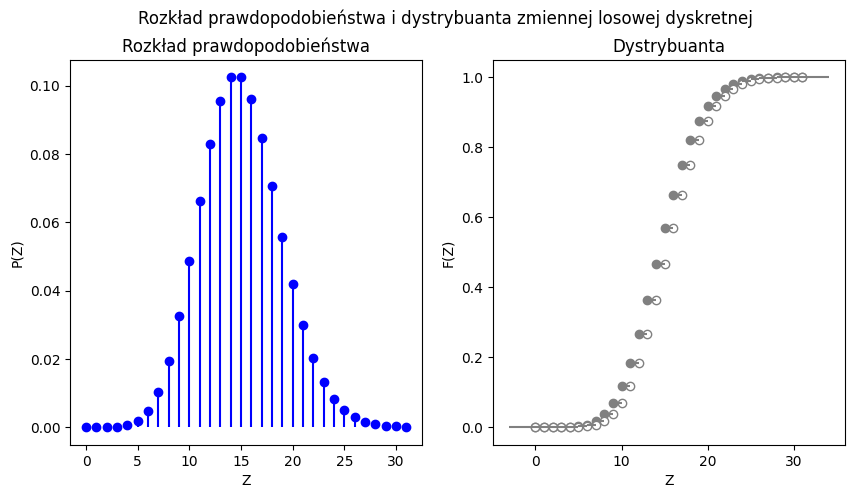

In [26]:
# YOUR CODE HERE
vizualize_discrete_distribution(r3p, r3f)

#### d) Podstawowe parametry rozkładu

Oblicz i zapisz do zmiennych następujące parametry rozkładu zmiennej losowej Z - wartość średnia (`r3_mean`), wariancja(`r3_var`) i odchylenie standardowe (`r3_std`).

Uwagi do wykonania zadania:
 - Wartości poszczególnych parametrów oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.poisson`.

In [27]:
# Wartość oczekiwana
# YOUR CODE HERE
r3_mean = np.average(r3p.index.values, weights=r3p['P(Z)'])

In [28]:
# Wariancja
# YOUR CODE HERE
r3_var=(r3p.index-r3_mean)**2*r3p["P(Z)"]
r3_var=np.sum(r3_var) 

In [29]:
# Odchylenie standardowe
# YOUR CODE HERE
r3_std=math.sqrt(r3_var) 

In [30]:
# Komórka testowa
assert np.isclose(r3_mean, 15.0)
assert np.isclose(r3_var, 15.0)
assert np.isclose(r3_std, 3.872983346207417)

AssertionError: 

### Zadanie 4: Obliczanie i wizualizacja prawdopodobieństw [6 pkt]
Oblicz i przedstaw na wykresach następujące prawdopodobieństwa:
- P(X>5)
- P(1<Y<=6)
- P(Z<=12 | Z>21)

Wyniki zapisz kolejno do zmiennych `p1`, `p2` i `p3` oraz przedstaw na wykresach korzystając z funkcji `vizualize_discrete_distribution()`.

#### a) P(X>5)

In [ ]:
mask = r1p.index>5
p_mask = r1p["P(X)"].values[mask]
p1=p_mask.sum()

In [ ]:
# Komórka testowa
assert np.isclose(p1, 0.7)

#### b) P(1<Y<=6)

In [ ]:
# YOUR CODE HERE
mask=(r2p.index>1 ) & (r2p.index<=6)
print(mask)
p_mask = r2p["P(Y)"].values[mask]
p2=p_mask.sum()

[False False  True  True  True  True  True False False False False]


In [ ]:
# Komórka testowa
assert np.isclose(p2, 0.8173828125)

#### c) P(Z<=12 | Z>21)

In [ ]:
# YOUR CODE HERE
mask=(r3p.index<=12) | (r3p.index>21)
p_mask = r3p["P(Z)"].values[mask]
p3=p_mask.sum()
p3

0.320627128243437

In [ ]:
# Komórka testowa
assert np.isclose(p3, 0.32071743985184814)

AssertionError: 